### **Data Pull from MySQL Database**

In [11]:
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
load_dotenv()

True

In [3]:
# Fetch credentials and connection info from environment
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PASSWORD")
host = os.getenv("MYSQL_HOST", "127.0.0.1")
port = int(os.getenv("MYSQL_PORT", "3306"))
database = os.getenv("MYSQL_DATABASE")

# Create SQLAlchemy engine
connection_url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_url)

In [ ]:
# Define your query
query = "SELECT * FROM banking_data"

# Read data into DataFrame
with engine.connect() as conn:
    df = pd.read_sql(query, conn)

# Display result
print("Connected to database:", database)

Connected to database: analysisfinancial


In [5]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail


In [6]:
df.shape

(3000, 25)

### **Data Cleaning and Transformation**

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [9]:
# Getting descriptive stats of the dataframe

df.describe().round(2)

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,51.04,21563.32,171305.03,25531.60,1.46,3176.21,591386.16,671560.19,321092.95,232908.35,29883.53,866759.81,1.52,2.25
std,19.85,12462.27,111935.81,16259.95,0.68,2497.09,457557.04,645716.86,282079.55,230007.78,23109.92,641230.32,1.10,1.13
min,17.00,12.00,15919.48,1482.03,1.00,1.17,0.00,0.00,0.00,0.00,45.00,0.00,0.00,1.00
25%,34.00,10803.50,82906.60,12513.78,1.00,1236.63,239628.14,204400.38,119947.53,74794.40,11916.54,374825.14,1.00,1.00
50%,51.00,21129.50,142313.48,22357.36,1.00,2560.81,479793.40,463316.46,242815.66,164086.56,24341.19,711314.66,2.00,2.00
75%,69.00,32054.50,242290.30,35464.74,2.00,4522.63,825813.04,942754.63,434874.94,315575.00,41966.39,1185110.08,2.00,3.00
max,85.00,43369.00,522330.26,75963.90,3.00,13991.99,2667556.66,3890598.08,1969923.08,1724118.36,124704.87,3825961.94,3.00,5.00


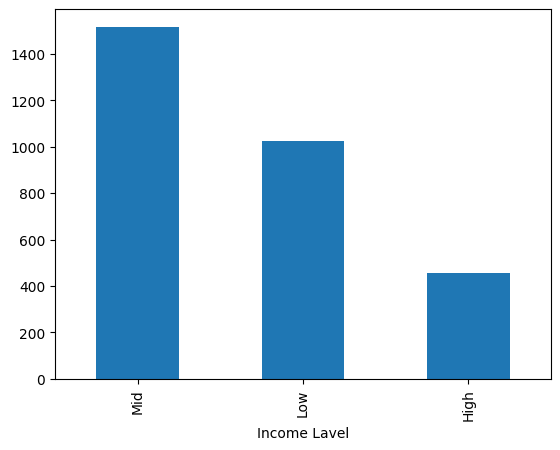

In [10]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

df['Income Lavel'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)
df['Income Lavel'].value_counts().plot(kind='bar')
plt.show()

In [12]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial,High
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail,Mid


#### **Univariate Analysis**


For column Nationality



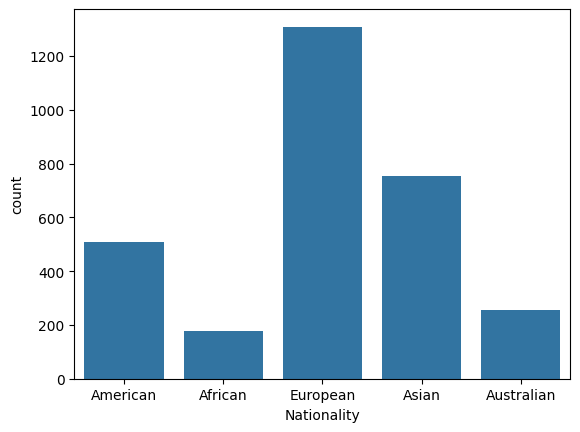


For column Fee Structure



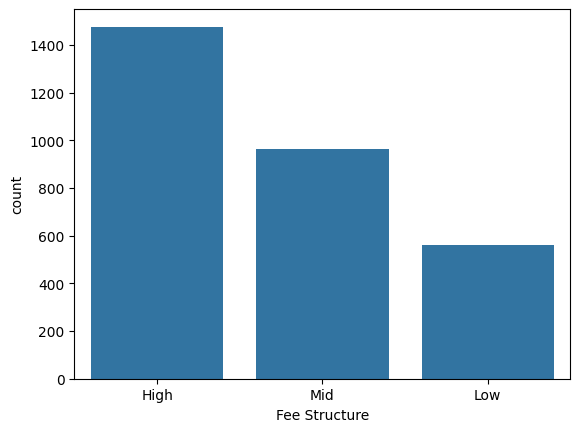


For column Loyalty Classification



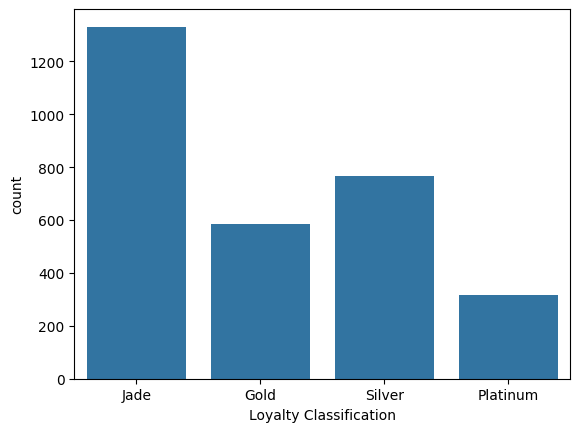


For column Amount of Credit Cards



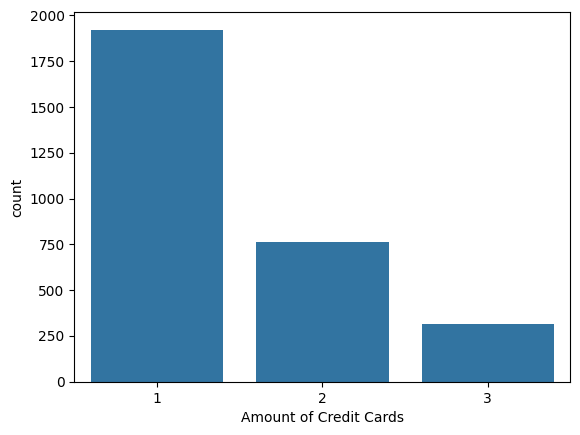


For column Properties Owned



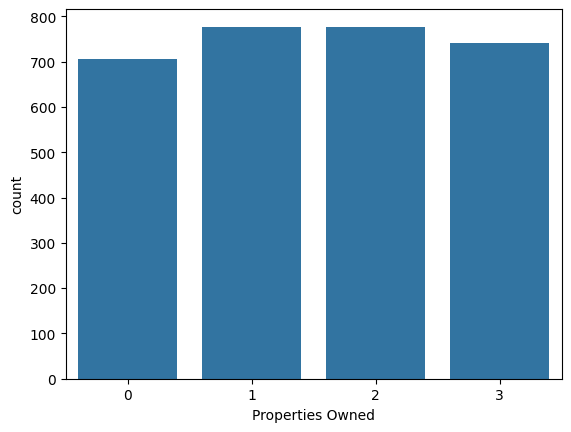


For column Risk Weighting



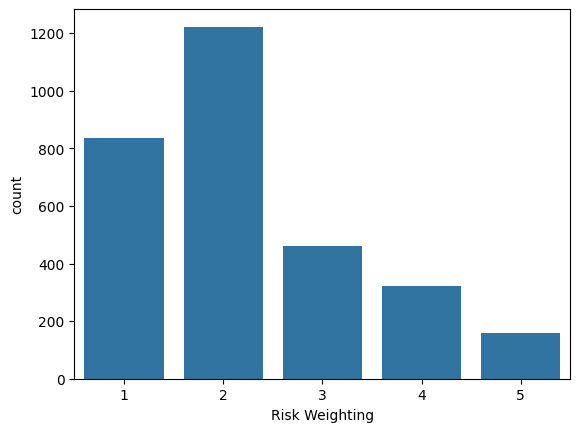


For column Gender



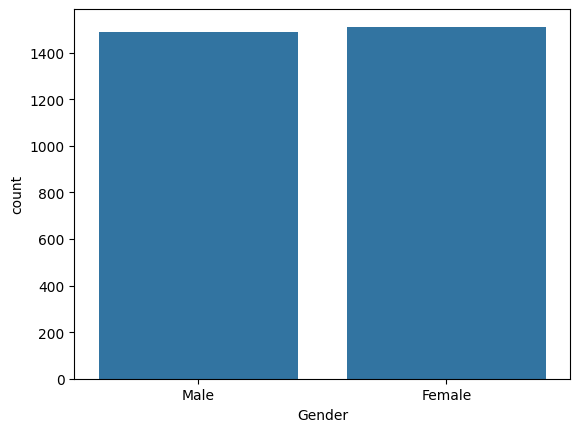


For column Banking Relationship



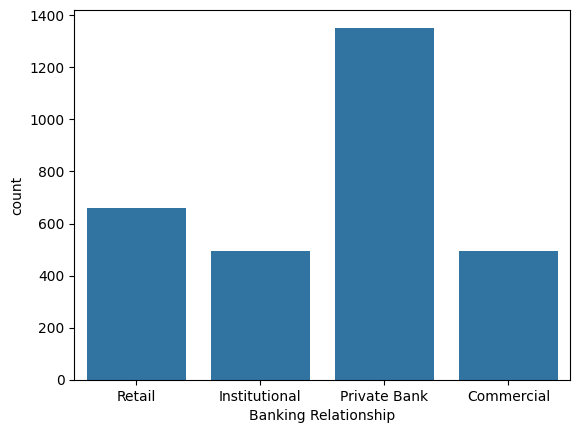


For column Income Lavel



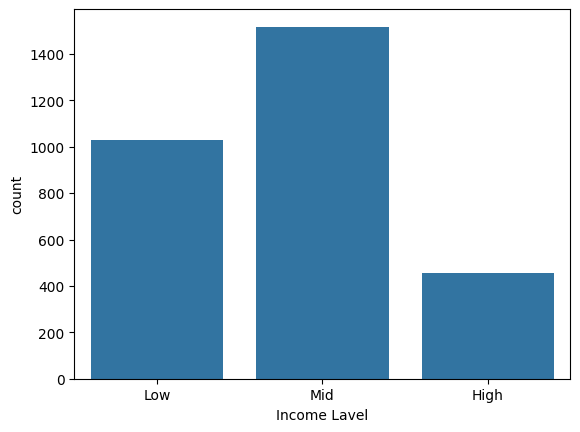

In [20]:
cat_cols = ['Nationality', 'Fee Structure', 'Loyalty Classification', 'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting', 'Gender', 'Banking Relationship', 'Income Lavel']

for i, p in enumerate(df[cat_cols]):
  print(f"\nFor column {p}\n")
  sns.countplot(data=df, x=p)
  plt.show()

In [25]:
len(df['Investment Advisor'].unique())

22

In [26]:
df['Investment Advisor'].value_counts(normalize=True)

Investment Advisor
Victor Dean          0.059000
Jeremy Porter        0.059000
Ernest Knight        0.059000
Eric Shaw            0.059000
Joe Carroll          0.059000
Steve Sanchez        0.058667
Daniel Carroll       0.058667
Victor Gutierrez     0.058667
Lawrence Sanchez     0.058667
Peter Castillo       0.058667
Carl Anderson        0.058667
Nicholas Ward        0.058667
Victor Rogers        0.029667
Kevin Kim            0.029667
Eugene Cunningham    0.029667
Fred Bryant          0.029333
Ryan Taylor          0.029333
Sean Vasquez         0.029333
Nicholas Morrison    0.029333
Jack Phillips        0.029333
Juan Ramirez         0.029333
Gregory Boyd         0.029333
Name: proportion, dtype: float64

In [27]:
df.head(3)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid


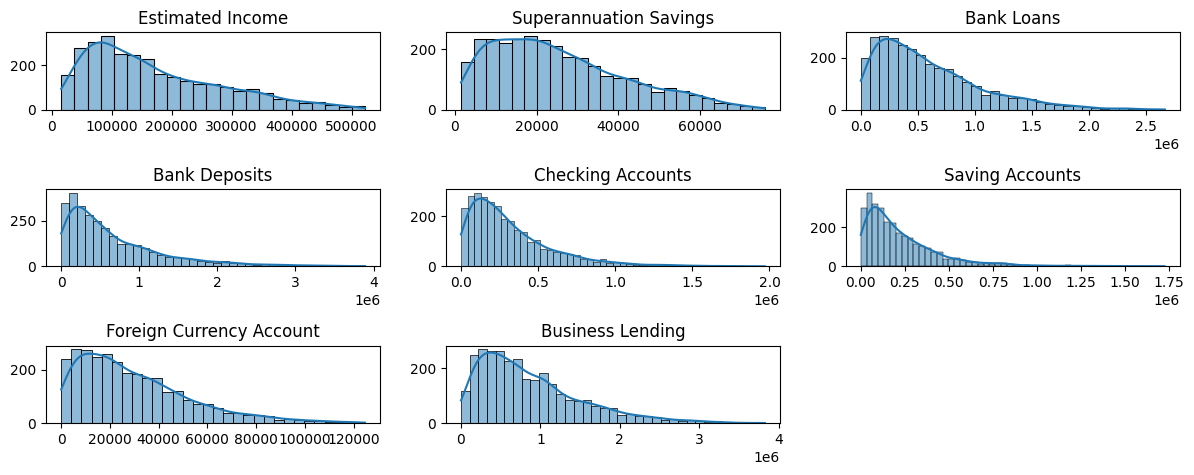

In [34]:
num_cols = ['Estimated Income', 'Superannuation Savings', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols):
  plt.subplot(4, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
  plt.ylabel('')
  plt.xlabel('')

plt.tight_layout()
plt.show()

#### **Bivariate Analysis**


For column Nationality



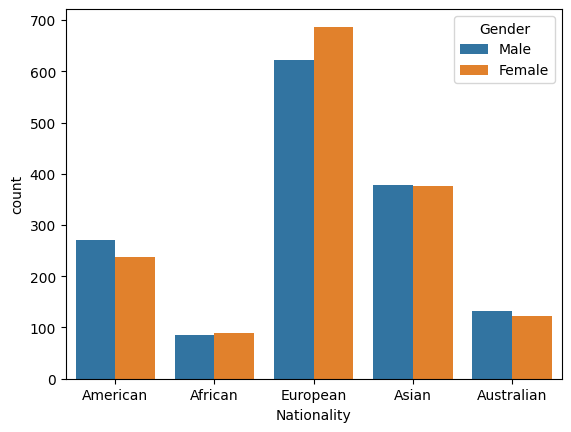


For column Fee Structure



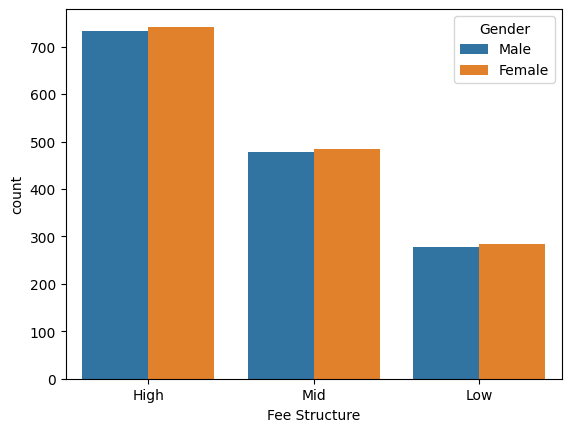


For column Loyalty Classification



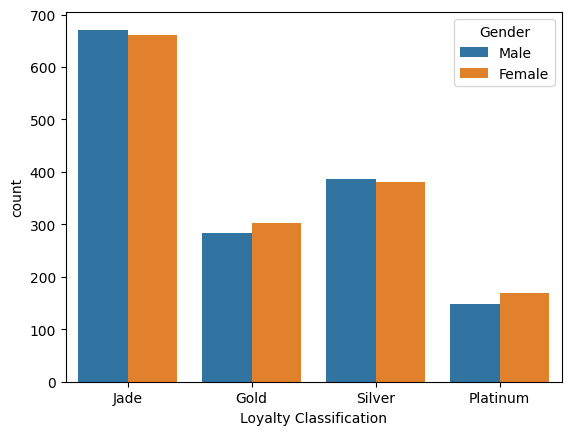


For column Amount of Credit Cards



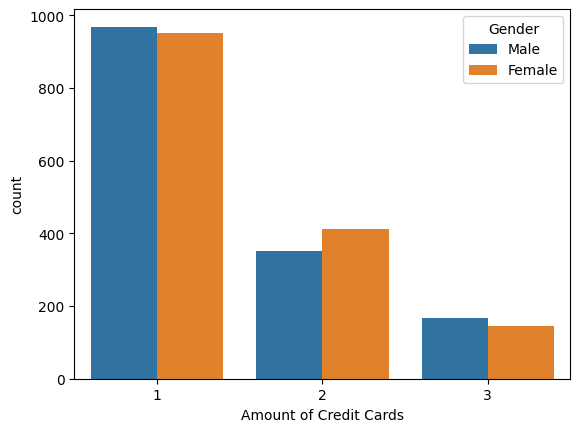


For column Properties Owned



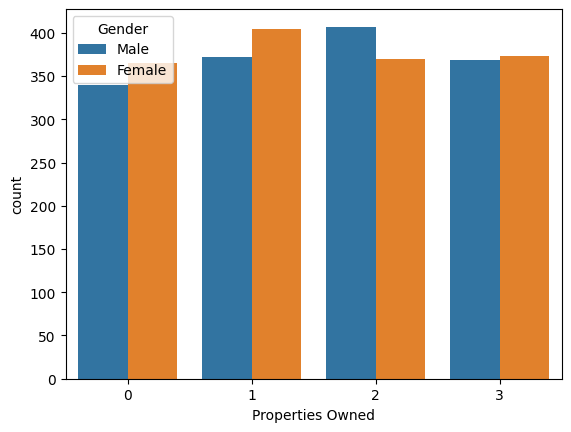


For column Risk Weighting



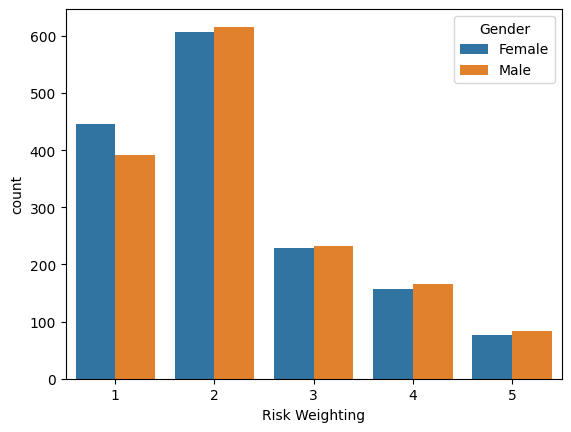


For column Banking Relationship



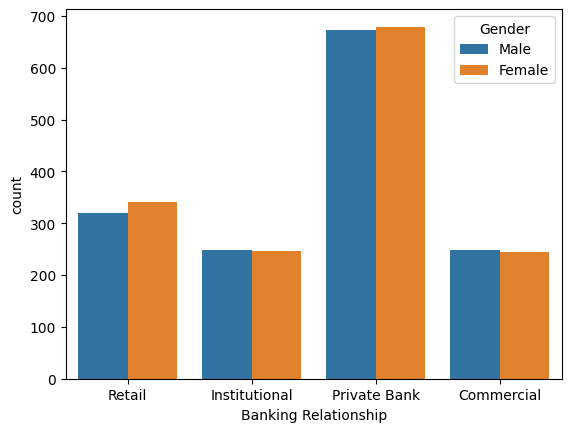


For column Income Lavel



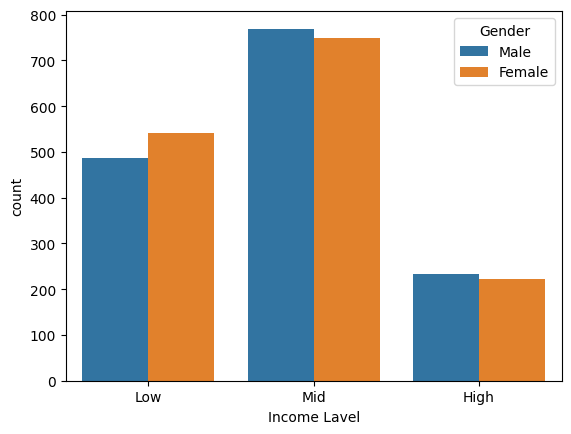

In [ ]:
cat_cols = ['Nationality', 'Fee Structure', 'Loyalty Classification', 'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting', 'Banking Relationship', 'Income Lavel']

for i, p in enumerate(df[cat_cols]):
  print(f"\nFor column {p}\n")
  sns.countplot(data=df, x=p, hue='Gender')
  plt.show()


For column Gender



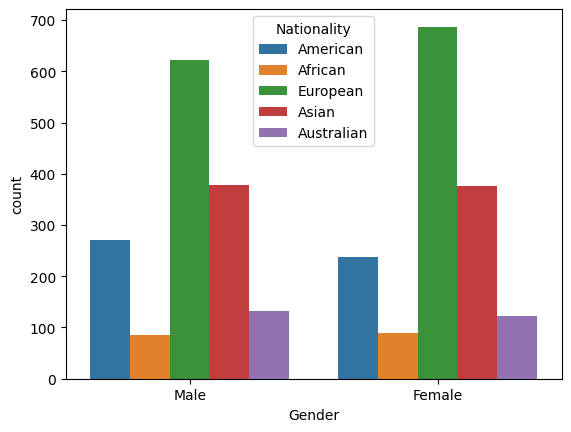


For column Fee Structure



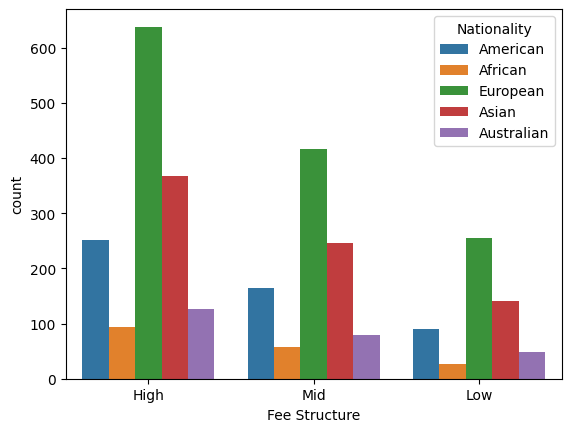


For column Loyalty Classification



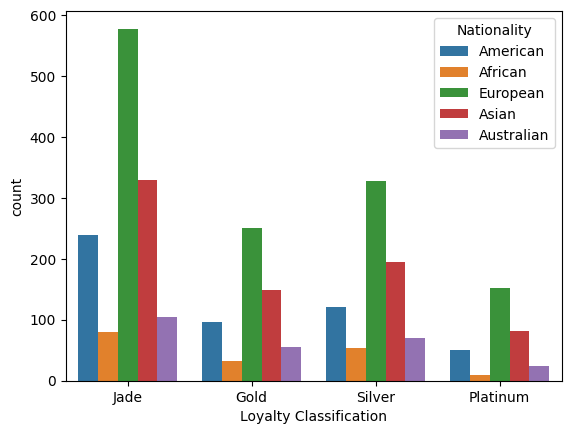


For column Amount of Credit Cards



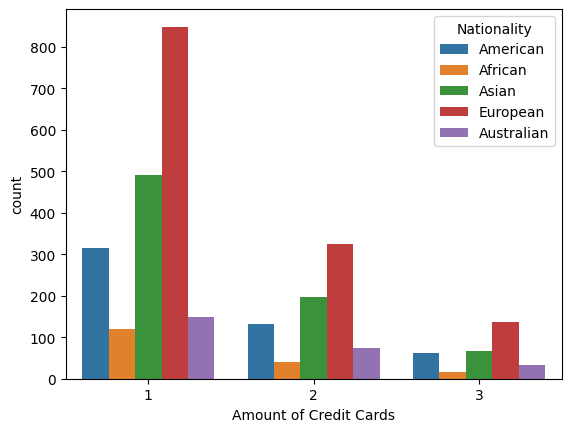


For column Properties Owned



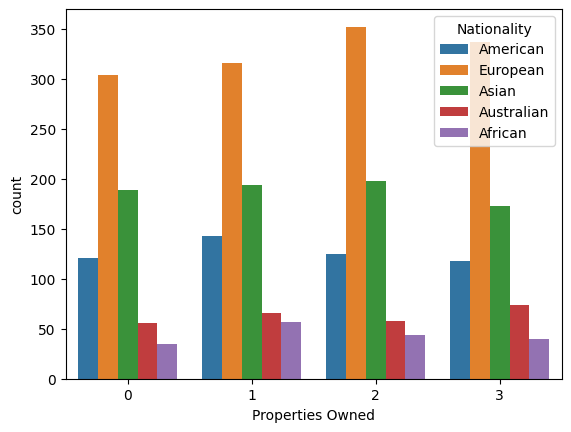


For column Risk Weighting



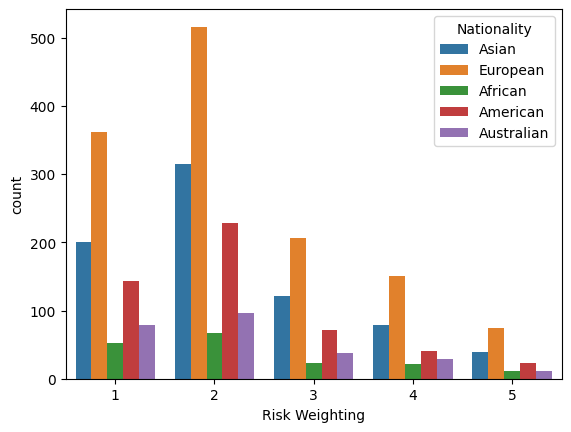


For column Banking Relationship



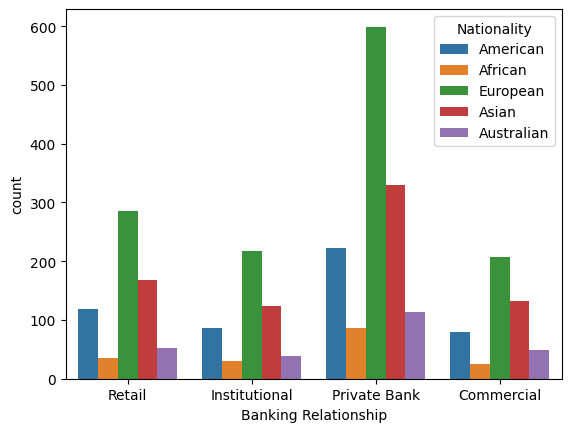


For column Income Lavel



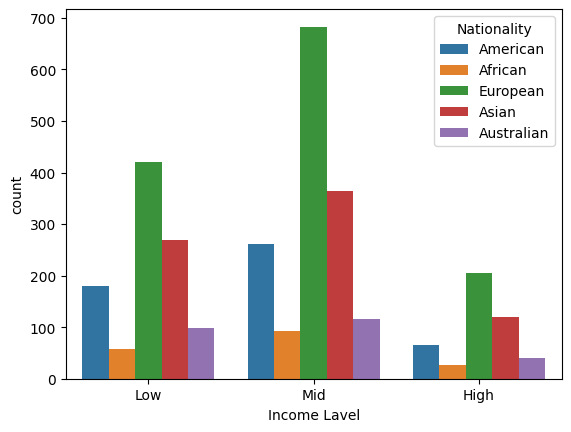

In [22]:
cat_cols = ['Gender','Fee Structure', 'Loyalty Classification', 'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting', 'Banking Relationship', 'Income Lavel']

for i, p in enumerate(df[cat_cols]):
  print(f"\nFor column {p}\n")
  sns.countplot(data=df, x=p, hue='Nationality')
  plt.show()

#### **Heatmap**

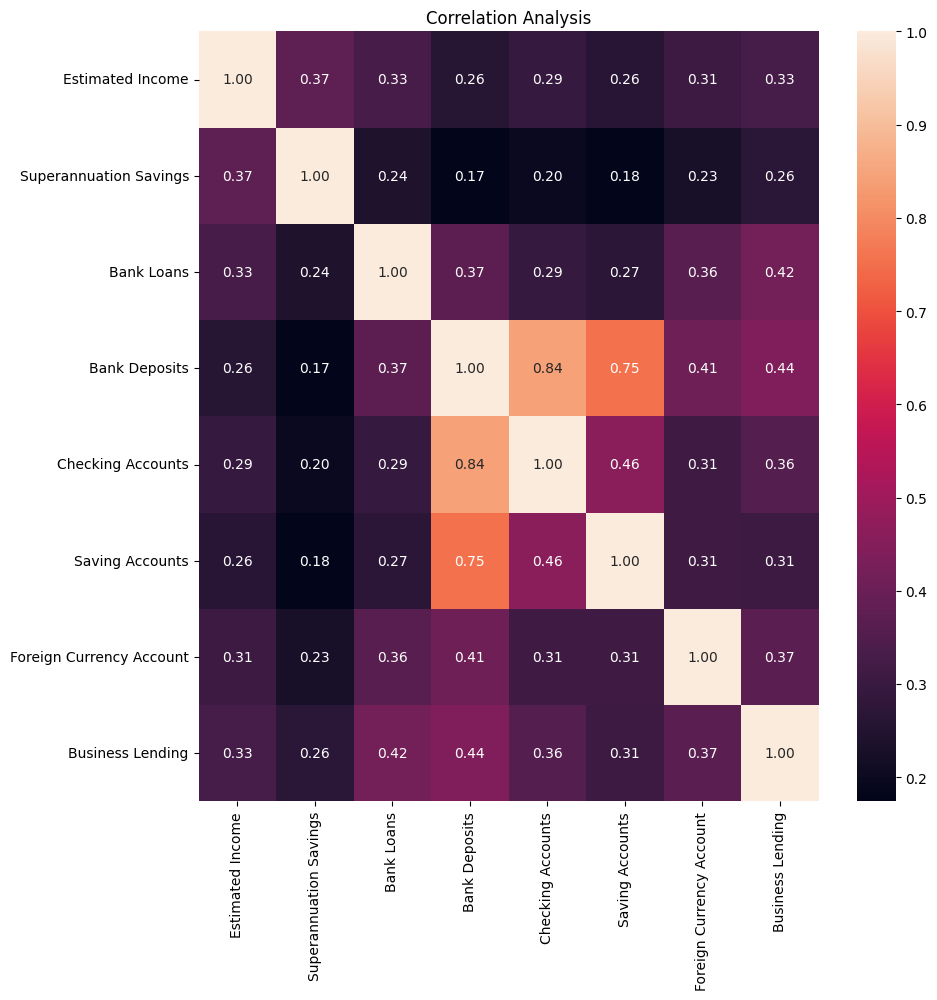

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation Analysis')
plt.show()

In [38]:
# Write DataFrame to MySQL (replace 'your_table_name' with your actual table)
df.to_sql(name='banking_data_updated', con=engine, if_exists='replace', index=False)

print("Data pushed successfully to MySQL!")

Data pushed successfully to MySQL!
